In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train=x_train/255
x_test=x_test/255

In [4]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)


In [5]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
print(y_train[:5])

[6 9 9 4 1]


In [6]:
print(list(set(y_train))) # all unique values in y_train
classes=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
classes=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
def plot_im(x,y,i):  
  plt.figure(figsize=(15,2))
  plt.imshow(x[i])
  plt.xlabel(classes[y[i]])

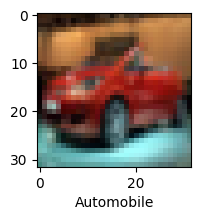

In [8]:
plot_im(x_train,y_train,45)

In [9]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Input(x_train.shape[1:]),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam' , loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        30,730 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,160 (121.72 KB)

 Trainable params: 31,160 (121.72 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history=model.fit(x_train,y_train,epochs=20, validation_split=0.2, batch_size=32 , verbose=False)

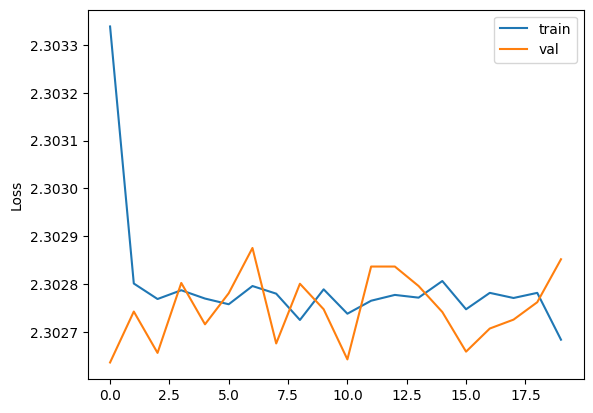

In [11]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
cnn=model=tf.keras.models.Sequential([
  #cnn
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3) , activation='relu' , input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3) , activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),

  #Dense
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam' , loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])
model.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 69ms/step - accuracy: 0.4031 - loss: 1.6471
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 81ms/step - accuracy: 0.6062 - loss: 1.1227
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.6625 - loss: 0.9757
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6940 - loss: 0.8791
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7149 - loss: 0.8099
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7343 - loss: 0.7591
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7521 - loss: 0.7048
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7697 - loss: 0.6587
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7850 - loss: 0.6146
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8041 - loss: 0.5620


In [14]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6948 - loss: 0.9239


[0.9447821378707886, 0.6942999958992004]

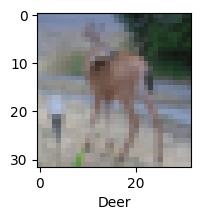

In [21]:
plot_im(x_test,y_test,100)

In [23]:
y_pre=np.argmax(cnn.predict(x_test[100:101]))
print(classes[y_pre])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Deer


In [17]:
#yesssssss

In [25]:
from tensorflow.keras.models import load_model

model.save('cifar_10_epochs.keras')